<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment-3----brightness-temperatures" data-toc-modified-id="Assignment-3----brightness-temperatures-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Assignment 3 -- brightness temperatures</a></span></li><li><span><a href="#Problem-1" data-toc-modified-id="Problem-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem 1</a></span></li><li><span><a href="#Problem-2" data-toc-modified-id="Problem-2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Problem 2</a></span></li></ul></div>

In [2]:
from pathlib import Path
from pyhdf.SD import SD, SDC
from matplotlib import pyplot as plt
from a301.scripts.hdf4ls import hdf4ls
import numpy as np
import math

# Assignment 3 -- brightness temperatures

Upload this notebook to canvas by 10am Monday Sept. 24

# Problem 1

In the cell below define a function that inverts the radiance (in MKS units) for the
brightness temperature in Kelvins.  Use the same format as the planck_function notebook,
and use the %%file magic to output your function to a file called planck_invert.py

i.e. the top of the cell should look like:

```python
%%file planck_invert.py
def radiance_invert(wavelengths, Lstar):
   etc.
```

In [3]:
# YOUR CODE HERE
def radiance_invert(wavelength, Lstar):
    Estar = Lstar * np.pi
    
    c1 = 3.74*10E7 
    c2= 1.44*10E3 
    numer = c1/((wavelength)**5)  
    temp = c2/(wavelength*(np.log((numer/Estar) + 1)))
    
    return temp
    

# Problem 2

In the next cell import your radiance_invert function and use it to turn the calibrated
radiances you've written out in your modis_data_analysis notebook into brightness temperatures
in Kelvins.  Plot the temperatures as an image, using a colorbar as in Modis level1b notebook

In [13]:
#Path.cwd finds the "current working directory", i.e. the directory holding this notebook.
this_dir=Path.cwd()
#move up one one folder and down to data
data_dir = this_dir/ Path('a301_code/data')
hdf_files=list(data_dir.glob("ch30_out.hdf"))
print(hdf_files)


[WindowsPath('C:/Users/Pearl/Desktop/ATSC 301/a301_code/data/ch30_out.hdf')]


0 ch30


Text(0.5,1,'Channel 30 radiance - Brightness Temperature Data')

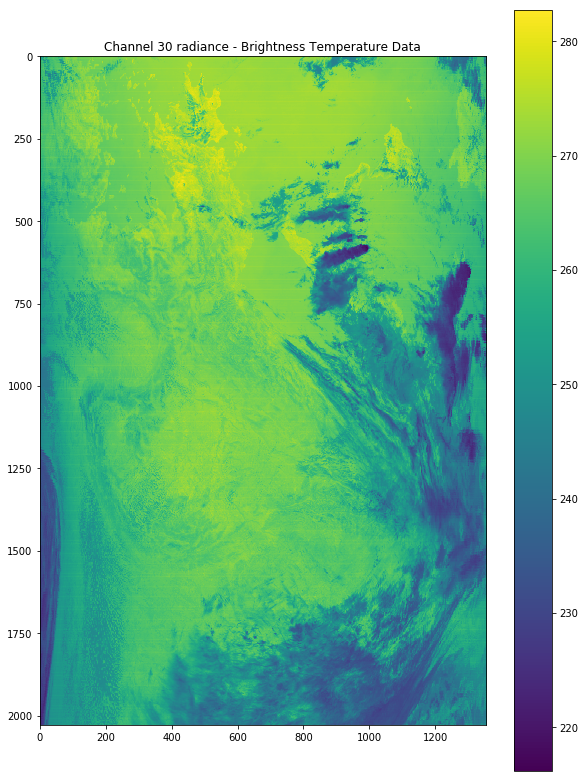

In [16]:

file_name = str(data_dir / Path(hdf_files[0]))
the_file = SD(file_name, SDC.READ)
datasets_dict = the_file.datasets()
for idx,sds in enumerate(datasets_dict.keys()):
    print(idx,sds)
r_data = the_file.select('ch30') # select sds
t_data = radiance_invert(9.73, r_data[:,:])

fig,ax = plt.subplots(1,1,figsize = (10,14))
CS=ax.imshow(t_data)
cax=fig.colorbar(CS)
ax.set_title('Channel 30 radiance - Brightness Temperature Data')
